Imports

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [179]:
df = pd.read_csv('SurveyResults.csv')
df.head()

,response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
0,1,Very helpful,Not at all helpful,Very important,Moderate effort,Slightly,Very important,Not at all important,Not at all,Extremely difficult,Slightly,Extremely important,Not at all important,NaN,NaN,NaN,NaN
1,2,Very helpful,Slightly helpful,Moderately important,Moderate effort,Very,Very important,Very important,Very,Moderately difficult,Moderately,Very important,Very important,Sometimes I accidentally turn the wrong burner...,A mobile app notification if a burner has been...,Touch controls can sometimes be frustrating if...,It’s straightforward and easy to understand. a...
2,3,Very helpful,Very helpful,Very important,Considerable effort,Very,Moderately important,Moderately important,Very,Very difficult,Moderately,Very important,Moderately important,NaN,NaN,NaN,NaN
3,4,Extremely helpful,Moderately helpful,Moderately important,Considerable effort,Slightly,Moderately important,Extremely important,Extremely,Slightly difficult,Extremely,Extremely important,Extremely important,NaN,NaN,NaN,NaN
4,5,Slightly helpful,Slightly helpful,Moderately important,Considerable effort,Moderately,Moderately important,Moderately important,Moderately,Slightly difficult,Very,Slightly important,Very important,NaN,NaN,NaN,NaN


Remove unimportant columns, encode data.

In [180]:
df = df.drop(['response','Q13','Q14','Q15','Q16'], axis=1)
encodes = {
    ("Slightly", "Little"): 2,
    ("Moderately", "Moderate"): 3,
    ("Very", "Considerable"): 4,
    ("Extremely", "great deal"): 5        
}
def encode(val: str) -> int:
    for key in encodes:
        for keyword in key:
            if keyword in val: return encodes[key]
    return 1

df = df.applymap(encode)

df.head()

C:\Users\Main User\AppData\Local\Temp\ipykernel_16120\3972226289.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(encode)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,4,1,4,3,2,4,1,1,5,2,5,1
1,4,2,3,3,4,4,4,4,3,3,4,4
2,4,4,4,4,4,3,3,4,4,3,4,3
3,5,3,3,4,2,3,5,5,2,5,5,5
4,2,2,3,4,3,3,3,3,2,4,2,4


Write a class to store results

In [181]:
class QuestionResult:
    def __init__(self):
        self.header = ''
        self.mean = 0
        self.stdDev = 0
    
    def __repr__(self):
        return f"{self.header}: {self.mean:.2f} ± {self.stdDev:.2f}"

In [182]:
results = []
for column in df.columns:
    result = QuestionResult()
    result.header = column
    values = df[column]
    result.mean = values.mean()
    result.stdDev = values.std()
    results.append(result)

print (results)
results.sort(key = lambda r: -r.mean)

print(results)


[Q1: 3.63 ± 1.15, Q2: 3.26 ± 1.03, Q3: 3.66 ± 0.81, Q4: 2.92 ± 0.94, Q5: 2.68 ± 1.16, Q6: 3.87 ± 0.91, Q7: 3.55 ± 1.08, Q8: 2.97 ± 1.26, Q9: 2.61 ± 0.95, Q10: 2.95 ± 1.06, Q11: 3.79 ± 1.02, Q12: 2.66 ± 1.19]
[Q6: 3.87 ± 0.91, Q11: 3.79 ± 1.02, Q3: 3.66 ± 0.81, Q1: 3.63 ± 1.15, Q7: 3.55 ± 1.08, Q2: 3.26 ± 1.03, Q8: 2.97 ± 1.26, Q10: 2.95 ± 1.06, Q4: 2.92 ± 0.94, Q5: 2.68 ± 1.16, Q12: 2.66 ± 1.19, Q9: 2.61 ± 0.95]


Chart the results

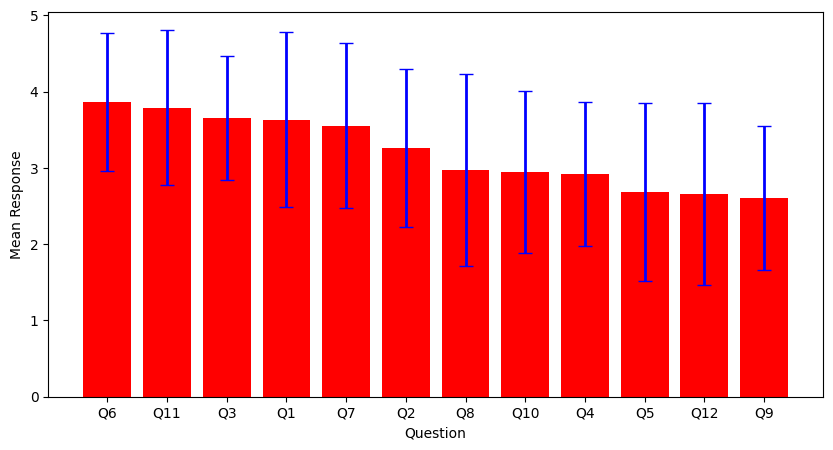

In [183]:


headers = [r.header for r in results]
means = [r.mean for r in results]
stdDev = [r.stdDev for r in results]

plt.figure(figsize=(10,5))
plt.bar(headers,means, yerr=stdDev, capsize=5, color = 'red', error_kw={'ecolor': 'blue', 'elinewidth': 2})
ax = plt.gca()
ax.set_xlabel('Question')
ax.set_ylabel('Mean Response')
plt.show()